In [153]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.svm as svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Reshape, GlobalAveragePooling1D
from keras.layers import Conv2D, MaxPooling2D, Conv1D, MaxPooling1D
from keras.utils import np_utils

In [154]:
car = pd.read_csv("C:/car.data")

In [155]:
car

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good


In [156]:
car.columns

Index(['vhigh', 'vhigh.1', '2', '2.1', 'small', 'low', 'unacc'], dtype='object')

In [157]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   vhigh    1727 non-null   object
 1   vhigh.1  1727 non-null   object
 2   2        1727 non-null   object
 3   2.1      1727 non-null   object
 4   small    1727 non-null   object
 5   low      1727 non-null   object
 6   unacc    1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [158]:
car.isnull().sum()

vhigh      0
vhigh.1    0
2          0
2.1        0
small      0
low        0
unacc      0
dtype: int64

In [159]:
car

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good


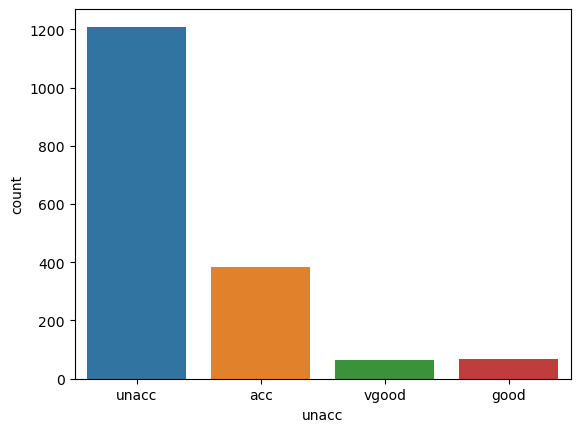

In [160]:
sns.countplot(data = car, x="unacc")

plt.show()

In [161]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in car.columns:
    car[i]=le.fit_transform(car[i])

Y = pd.get_dummies(y).values

from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0)  

In [162]:
X = car.iloc[:, :-1]
y = car.iloc[:, [-1]]

In [163]:
X

,vhigh,vhigh.1,2,2.1,small,low
0,3,3,0,0,2,2
1,3,3,0,0,2,0
2,3,3,0,0,1,1
3,3,3,0,0,1,2
4,3,3,0,0,1,0
...,...,...,...,...,...,...
1722,1,1,3,2,1,2
1723,1,1,3,2,1,0
1724,1,1,3,2,0,1
1725,1,1,3,2,0,2


In [164]:
Y

array([[2],
       [2],
       [2],
       ...,
       [2],
       [1],
       [3]])

In [165]:
'''
X_train = X_train.values.reshape(X_train.shape[0], X_train.shape[1] * X_train.shape[2])
X_test = X_test.values.reshape(X_test.shape[0], X_test.shape[1] * X_test.shape[2])
'''

'\nX_train = X_train.values.reshape(X_train.shape[0], X_train.shape[1] * X_train.shape[2])\nX_test = X_test.values.reshape(X_test.shape[0], X_test.shape[1] * X_test.shape[2])\n'

In [166]:
import numpy as np
# 평균

mean = np.mean(X_train, axis = 0)

# 표준편차
std = np.std(X_train, axis = 0) # 표준편차값

# 표준화값
X_train = (X_train - mean) / std
X_test = (X_test - mean) / std

In [167]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.optimizers import SGD,Adam

In [168]:
model_m = Sequential()

model_m.add(Reshape((6, 1), input_shape=(X_train.shape[1], 1)))

model_m.add(Conv1D(6, 1, activation='relu'))
model_m.add(Conv1D(6, 1, activation='relu'))

model_m.add(MaxPooling1D(3))

model_m.add(Conv1D(6, 1, activation='relu'))

model_m.add(Conv1D(6, 1, activation='relu'))

model_m.add(GlobalAveragePooling1D())

model_m.add(Dropout(0.5))

model_m.add(Dense(1, activation='softmax'))

print(model_m.summary())

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape_10 (Reshape)        (None, 6, 1)              0         
                                                                 
 conv1d_32 (Conv1D)          (None, 6, 6)              12        
                                                                 
 conv1d_33 (Conv1D)          (None, 6, 6)              42        
                                                                 
 max_pooling1d_8 (MaxPooling  (None, 2, 6)             0         
 1D)                                                             
                                                                 
 conv1d_34 (Conv1D)          (None, 2, 6)              42        
                                                                 
 conv1d_35 (Conv1D)          (None, 2, 6)              42        
                                                     

In [169]:
model_m.compile(optimizer = 'rmsprop', loss = 'mse', metrics = ['mse'])

In [170]:
from keras import models
from keras import layers

model_m.fit(X_train, y_train, epochs=80, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model_m.evaluate(X_test, y_test)

11/11 [==============================] - 0s 2ms/step - loss: 1.0983 - mse: 1.0983


In [171]:
test_mae_score

1.0982658863067627